# Multiprocessing

Модуль multiprocessing позволяет вам создавать процессы таким же образом, как при создании потоков при помощи модуля threading, и воспользоваться возможностью использования нескольких процессоров на компьютере.

Класс Process очень похож на класс Thread модуля threading. Попробуем создать несколько процессов, которые вызывают одну и ту же функцию

In [8]:
from multiprocessing import Process, current_process
import time
 
def doubler(number):
    result = number * 2
    proc_name = current_process().name
    time.sleep(3)
    print('{0} doubled to {1} by: {2}'.format(
        number, result, proc_name))
 
 
if __name__ == '__main__':
    numbers = [5, 10, 15, 20, 25]
    procs = []
    proc = Process(target=doubler, args=(5,))
    
    for index, number in enumerate(numbers):
        proc = Process(target=doubler, args=(number,))
        procs.append(proc)
        proc.start()
    
    for proc in procs:
        proc.join()

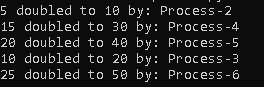

Для этого примера мы импортируем Process и создаем функцию doubler. Внутри функции, мы дублируем число, которое мы ей передали

Мы используем current_process() для того, чтобы получить имя потока, который вызывает нашу функцию.

##  Lock

Модуль multiprocessing поддерживает замки так же, как и модуль threading. Все что вам нужно, это импортировать Lock, повесить его, сделать что-нибудь и снять его. Давайте посмотрим:

In [9]:
import logging
import multiprocessing
from multiprocessing import Process, Lock

def printer(item, lock):
    lock.acquire()
    try:
        print(item)
    finally:
        lock.release()
        
if __name__ == '__main__':
    lock = Lock()
    items = ['tango', 'foxtrot', 10]
    multiprocessing.log_to_stderr()
    
    logger = multiprocessing.get_logger()
    logger.setLevel(logging.INFO)
    
    for item in items:
        p = Process(target=printer, args=(item, lock))
        p.start()

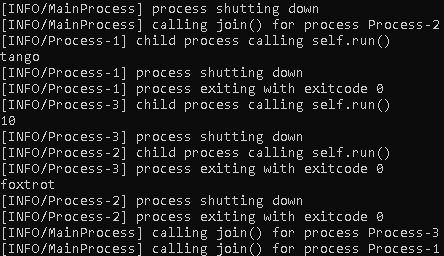

Здесь мы создали простую функцию вывода, которая выводит все, что вы ей передаете. Чтобы не дать процессам конфликтовать друг с другом, мы используем объект Lock. Этот код зациклится над нашим списком из трех объектов и создаст процесс для каждого из них. Каждый процесс будет вызывать нашу функцию, и передавать её одному из объектов. Так как мы используем замки, следующий процесс в строке будет ждать, пока замок не снимается, после чего он сможет продолжить.

## Pool

Класс Pool используется для показа пула рабочих процессов. Он включает в себя методы, которые позволяют вам разгружать задачи к рабочим процессам.

In [ ]:
from multiprocessing import Pool
 
def doubler(number):
    return number * 2
 
if __name__ == '__main__':
    numbers = [5, 10, 20]
    pool = Pool(processes=3)
    print(pool.map(doubler, numbers))

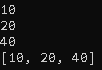

Здесь мы создали экземпляр Pool и указали ему создать три рабочих процесса. Далее мы используем метод map для отображения функции для каждого процесса. Наконец мы выводим результат, что в нашем случае является списком: [10, 20, 40].

Документация: https://docs.python.org/3.5/library/multiprocessing.html

# Asyncio

Асинхронность является альтернативой многопоточности для написания параллельных приложений. 

Разница Threads и Asyncio в том что asyncio переключает функцию на слове await, а остальные асинхронные функции ставит в очередь, а потоки запускаются сразу и переключаются в произвольном месте. Asyncio позволяет выполнить другие задачи пока относительно медленное соединение передает данные, когда данные пришли - возвращается к их обработке.


In [ ]:
import asyncio

async def one():
    print('Выполнение one()')
    print('Подождать 3 секунды')
    await asyncio.sleep(3)
    print('Обратное переключение на one()')


async def two():
    print('Переключился на two()')
    print('Подождать 4 секунды')
    await asyncio.sleep(4)
    print('Обратное переключение на two()')


ioloop = asyncio.get_event_loop()
tasks = [ioloop.create_task(one()), ioloop.create_task(two())]
wait_tasks = asyncio.wait(tasks)
ioloop.run_until_complete(wait_tasks)
ioloop.close()

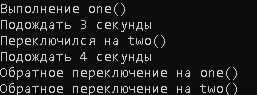

Документация asyncio: https://docs.python.org/3.5/library/asyncio.html